In [0]:
# Chạy trong notebook cell đầu tiên
%pip install pydicom faiss-cpu transformers torch pillow --quiet

dbutils.library.restartPython()



Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
df_query = spark.read.format("delta").table("dbms.gold.mri_embedding_1000")
df_embed = df_query.toPandas()  # Chuyển sang Pandas
display(df_embed)

sop_instance_uid series_uid path embedding 1.3.6.1.4.1.9590.100.1.2.95048863011186367636245850912794180648 1.3.12.2.1107.5.2.40.50233.2016030909230298439604944.0.0.0 /Volumes/dbms/bronze/lumbar-spine-dataset/MRI-data/0001/L-SPINE_LSS_20160309_091629_240000/T2_TSE_SAG_384_0002/T2_TSE_SAG__0001_006.ima List(-0.00897268, -0.010246079, 0.027398493, 0.027608585, -0.018384289, -0.003749946, -0.009443391, 0.021316236, 0.044846945, -0.015511164, 0.06382239, 0.0055616596, 0.028163098, -0.03339552, -0.027509652, -0.04547222, 0.058215752, 0.030369988, -0.0021392389, 0.019393161, -0.0032232984, 0.035865773, 0.020378102, 0.0025918477, 0.005049336, -0.025392802, -0.003121327, -0.014564707, -0.006425962, 0.0219315, -0.009725097, 0.007923227, -0.0024123397, -0.040562566, -0.013842869, 0.007192675, 0.007928076, -0.013979955, 0.004129702, -0.04738334, -0.040097203, -0.04422591, -0.02508062, -0.034007244, 0.020801108, -0.0906113, -0.022272225, 0.025347527, -0.057871968, -0.028511504, 0.043707397, -3.6689575E-4, 0.0018261949, -0.011358874, 0.02132778, 0.033419188, 0.011203804, -0.010841393, 0.0062273485, 0.023587, 0.10466525, -0.004252618, -0.04624033, 0.024138995, -0.023809005, 0.051376414, -1.756547E-4, 0.03385397, 0.052025355, 0.019944556, -0.023347015, -0.0037392494, -0.0017319177, -0.054974418, -0.04603584, 0.0014963284, 0.036965318, -0.022347404, 7.954285E-4, 0.020740291, 0.057085354, 0.013186734, -0.052262947, 0.016764417, -0.011422637, 0.019222979, 0.1606221, 0.046555527, 0.04395043, 0.032703057, 0.029279612, -0.06265239, -0.5354352, 0.012588838, -0.047348138, 0.017900445, 0.05857679, -0.023869058, -0.047381505, -0.02642483, 0.020243034, 0.018578513, 0.06405755, 0.024874019, 0.0592796, -0.0040041804, -0.15328667, 0.03501746, -0.0106123295, 0.006456251, 0.008730894, -0.03256467, 0.012037736, -0.038769267, -0.046250757, -0.07039341, 0.018920591, -0.030168695, -0.045241542, 0.013935901, -0.033348072, -0.024267592, -0.07961943, -0.0028970076, 0.035488833, 0.102785416, -0.0024809842, -0.038516276, 0.003644802, -0.010291887, -0.05354688, -0.031633373, 0.0021133877, 0.084621616, 0.034590572, -0.0030661912, -0.03777402, -0.09887191, 0.006218406, 0.0013060671, 0.0022893199, 0.015501487, -0.0957691, 0.0183351, 0.013518762, -0.0049134092, 0.047619835, 0.017690264, -9.694365E-4, 0.0010096498, 0.0031993277, -0.010614093, -0.022316227, -0.023936322, 0.0016147424, -0.056744266, -0.0015262784, -0.0593107, 0.0336301, 0.06271725, -0.037317086, -0.017845767, -0.023599, -0.009204776, -0.009940149, -0.0063457554, -0.05765243, -0.00902332, -0.013594498, 0.032902777, 0.0019937907, -0.012851334, 0.011611885, -0.025473975, -0.02234571, -0.0134276, 0.022389038, -0.017609317, -0.042171877, 0.0051364554, -0.037934233, -0.044040315, 0.0011866302, -0.009822728, 0.0045987153, -0.028833225, 0.0126993535, -0.0130061535, -0.005144735, 0.034108978, 0.0016570224, 0.01517978, -0.052408636, -0.023987764, 0.08273235, -0.03708845, -0.04965667, -0.035199743, -0.03201062, -0.020268448, -0.0037413563, 5.978042E-4, 0.02325667, 0.043935128, -0.0032843323, -0.02682062, 0.04371527, -9.234324E-4, -0.032893907, 0.037451886, -0.024854712, 0.03268203, -0.041651554, 0.005482006, 0.028018495, 0.04178776, -0.0111118425, -0.035225596, -0.08260751, 0.006499489, -0.007534379, 0.008536874, -0.0144351395, 0.013518642, -0.054228842, 0.018778056, -0.020301307, 0.001114534, 0.02223288, -0.0034845215, 0.0056662327, 0.016781831, 0.026551776, 0.006858161, 0.0015478728, -0.0029553543, -8.733648E-4, -0.01598771, -0.032064687, 0.05225453, 0.0017163551, 0.021937223, -0.016578728, -0.020410206, 0.022953816, -0.05397263, 0.025057089, 0.02835781, -0.04495796, -0.04220155, -0.044670567, 0.024887603, 0.0053302464, -0.016486973, 0.0017022054, 0.0041706623, -0.046340287, 0.03498336, 0.0013235431, 0.055994935, 0.0059663286, 8.1979914E-4, 0.02620186, -0.06605313, 0.03299973, 0.022524128, 0.048863076, -0.043248285, -0.01974367, 0.007814051, -0.021869825, 0.0040610353, -0.01925102, -0.06056383, -7.5593404E-4, -0.0137

In [0]:
import torch
import numpy as np
from PIL import Image
import pydicom

# Load sẵn CLIP model (đặt ngoài hàm để tránh load lại mỗi vòng)
from transformers import CLIPProcessor, CLIPModel
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
model.eval()

def extract_embedding(image_path: str):
    """
    Đọc file .ima/.dcm, chuyển sang RGB và sinh embedding 512 chiều.
    Trả về numpy array hoặc None nếu lỗi.
    """
    try:
        # --- Đọc file DICOM / IMA ---
        dicom_data = pydicom.dcmread(image_path)
        image_array = dicom_data.pixel_array.astype(np.float32)

        # --- Chuẩn hóa dữ liệu pixel về [0,255] ---
        image_array -= np.min(image_array)
        max_val = np.max(image_array)
        if max_val > 0:
            image_array = (image_array / max_val) * 255
        image_array = image_array.astype(np.uint8)

        # --- Chuyển sang ảnh RGB ---
        img = Image.fromarray(image_array).convert("RGB")

        # --- Sinh embedding ---
        inputs = processor(images=img, return_tensors="pt")
        with torch.no_grad():
            emb = model.get_image_features(**inputs)

        # --- Chuẩn hóa L2 ---
        emb = emb / emb.norm(p=2, dim=-1, keepdim=True)

        # --- Trả về vector numpy (1x512) ---
        return emb.squeeze().cpu().numpy()

    except Exception as e:
        print(f"⚠️ Error reading {image_path}: {e}")
        return None


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

✅ Loaded FAISS index: 1000 vectors
✅ Query vector shape: (1, 512)

✅ Top 10 ảnh tương tự (Distance):
  1. Index:   50 | Distance: 0.0000 | Path: /Volumes/dbms/bronze/lumbar-spine-dataset/MRI-data/0001/L-SPINE_LSS_20160309_091629_240000/T2_TSE_SAG_384_0002/T2_TSE_SAG__0001_002.ima
  2. Index:   59 | Distance: 0.0509 | Path: /Volumes/dbms/bronze/lumbar-spine-dataset/MRI-data/0001/L-SPINE_LSS_20160309_091629_240000/T1_TSE_SAG_320_0003/T1_TSE_SAG__0001_001.ima
  3. Index:  113 | Distance: 0.0590 | Path: /Volumes/dbms/bronze/lumbar-spine-dataset/MRI-data/0002/L-SPINE_CLINICAL_LIBRARIES_20160621_112938_873000/T2_TSE_SAG_384_0002/T2_TSE_SAG__0002_002.ima
  4. Index:   35 | Distance: 0.0595 | Path: /Volumes/dbms/bronze/lumbar-spine-dataset/MRI-data/0001/L-SPINE_LSS_20160309_091629_240000/T2_TSE_SAG_384_0002/T2_TSE_SAG__0001_001.ima
  5. Index:   53 | Distance: 0.0634 | Path: /Volumes/dbms/bronze/lumbar-spine-dataset/MRI-data/0001/L-SPINE_LSS_20160309_091629_240000/T1_TSE_SAG_320_0003/T1_TSE_SA

/home/spark-c8f4bf82-b978-41e8-a47c-29/.ipykernel/5049/command-4856306183316580-2727937987:90: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/databricks/python/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


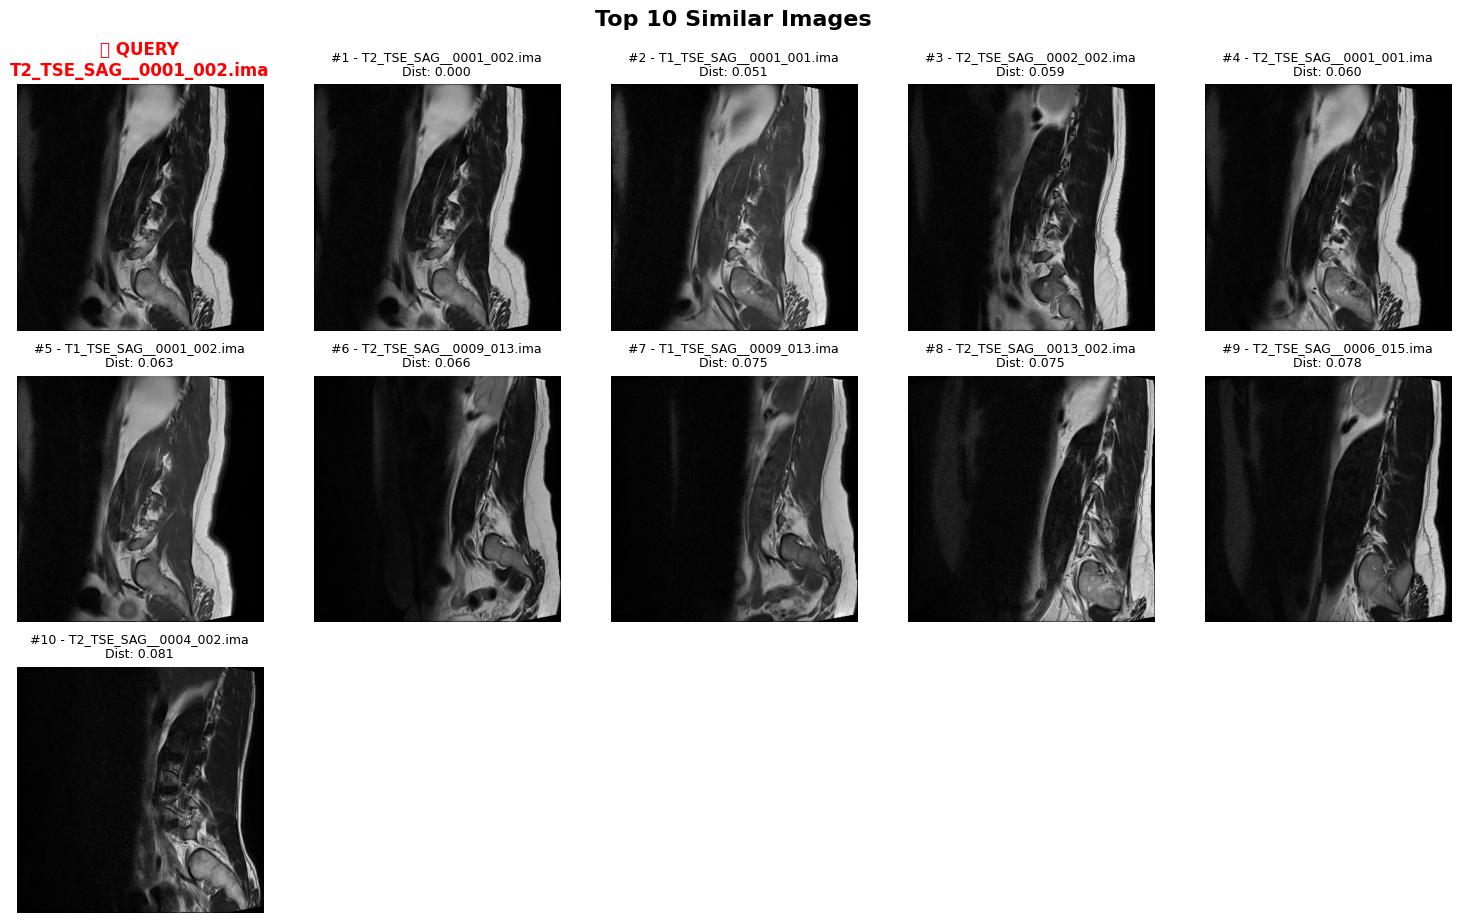


📊 Thống kê khoảng cách:
   Min: 0.0000
   Max: 0.0813
   Mean: 0.0608
   Median: 0.0649


In [0]:
import numpy as np
import faiss
import matplotlib.pyplot as plt
from PIL import Image
import pydicom

# ===== CẤU HÌNH =====
k = 10  # Số ảnh tương tự cần tìm (thay đổi tùy ý)
index_path = "/Volumes/dbms/bronze/mri_index/faiss_index_1000.bin"
query_path = "/Volumes/dbms/bronze/lumbar-spine-dataset/MRI-data/0001/L-SPINE_LSS_20160309_091629_240000/T2_TSE_SAG_384_0002/T2_TSE_SAG__0001_002.ima"

# ===== LOAD INDEX =====
index = faiss.read_index(index_path)
print(f"✅ Loaded FAISS index: {index.ntotal} vectors")

# ===== TẠO QUERY EMBEDDING =====
query_vec = extract_embedding(query_path)

if query_vec is not None:
    query_vec = np.array(query_vec, dtype=np.float32).reshape(1, -1)
    print(f"✅ Query vector shape: {query_vec.shape}")
else:
    raise ValueError("⚠️ Không thể sinh embedding cho ảnh query")

# ===== TÌM KIẾM TOP K ẢNH =====
D, I = index.search(query_vec, k)

print(f"\n✅ Top {k} ảnh tương tự (Distance):")
for i, (idx, dist) in enumerate(zip(I[0], D[0])):
    print(f"  {i+1}. Index: {idx:4d} | Distance: {dist:.4f} | Path: {df_embed.iloc[idx]['path']}")

# ===== HÀM ĐỌC ẢNH =====
def load_image(path):
    """Đọc ảnh DICOM hoặc ảnh thường"""
    try:
        if path.lower().endswith((".dcm", ".ima")):
            dcm = pydicom.dcmread(path)
            img_array = dcm.pixel_array
            # Chuẩn hóa về [0, 255]
            img_array = ((img_array - img_array.min()) / (img_array.max() - img_array.min()) * 255).astype(np.uint8)
            img = Image.fromarray(img_array).convert("L")
        else:
            img = Image.open(path).convert("RGB")
        return img
    except Exception as e:
        print(f"⚠️ Lỗi đọc ảnh {path}: {e}")
        return None

# ===== HIỂN THỊ KẾT QUẢ =====
# Tính số hàng và cột tự động
cols = min(5, k + 1)  # Tối đa 5 cột
rows = (k + 1 + cols - 1) // cols  # Làm tròn lên

fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
axes = axes.flatten() if k > 1 else [axes]  # Xử lý trường hợp k=1

# Hàm lấy tên file ngắn gọn
def get_short_filename(path, max_len=30):
    """Lấy tên file và rút ngắn nếu quá dài"""
    filename = path.split('/')[-1]
    if len(filename) > max_len:
        return filename[:max_len-3] + "..."
    return filename

# Hiển thị ảnh Query
query_img = load_image(query_path)
axes[0].imshow(query_img, cmap='gray')
query_name = get_short_filename(query_path)
axes[0].set_title(f"🔍 QUERY\n{query_name}", fontsize=12, fontweight='bold', color='red')
axes[0].axis("off")

# Hiển thị top K ảnh tương tự
for i, (idx, dist) in enumerate(zip(I[0], D[0]), start=1):
    if i >= len(axes):
        break
    
    img_path = df_embed.iloc[idx]["path"]
    img = load_image(img_path)
    axes[i].imshow(img, cmap='gray')
    
    # Tên file ngắn gọn
    img_name = get_short_filename(img_path)
    axes[i].set_title(f"#{i} - {img_name}\nDist: {dist:.3f}", fontsize=9)
    axes[i].axis("off")

# Tắt các subplot thừa
for j in range(k + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.suptitle(f"Top {k} Similar Images", fontsize=16, fontweight='bold', y=1.02)
plt.show()

# ===== THỐNG KÊ THÊM =====
print(f"\n📊 Thống kê khoảng cách:")
print(f"   Min: {D[0].min():.4f}")
print(f"   Max: {D[0].max():.4f}")
print(f"   Mean: {D[0].mean():.4f}")
print(f"   Median: {np.median(D[0]):.4f}")# Chạy trong notebook cell đầu tiên
